I know this stuff exists in a lot of the analyses I have done but I find it easier to just start fresh on this one page and have everything I need very concisely

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
import matplotlib as mpl
import sys
sys.path.insert(1, '../../../string/analysis/scripts')
from plot_parameters_for_paper import *

plotting_params()

In [12]:
condition = 'influx_apo'
skip25 = False
if skip25:
    skipframe = '.skip25.'
else:
    skipframe = '.'

sim_names = ['OutOcc', 'Occ', 'InOcc']    
    
starting_ps_name_dir = {'influx_BFRU':['8500', '10780', '8500'], #OutOcc-Occ, Occ-InOcc, OutOcc-InOcc
                       'influx_apo':['11200', '10000', '11200'],
                       'efflux_BFRU':['12980', '10000',  '10000'],  #Occ-OutOcc, InOcc-Occ, InOcc-OutOcc
                       'efflux_apo':['8600', '9600', '9600']
                       }



indir = f'../../state_by_state_running/targeted_MD/{condition}_all_heavy'

if 'influx' in condition:
    OF_side_darkblue = mda.Universe(f'{indir}/OutOcc-Occ/OutOpen-OutOcc.{starting_ps_name_dir[condition][0]}ps.gro', \
                          f'{indir}/OutOcc-Occ/OutOcc-Occ{skipframe}xtc')
    IF_side_greenblue = mda.Universe(f'{indir}/Occ-InOcc/OutOcc-Occ.{starting_ps_name_dir[condition][1]}ps.gro', \
                          f'{indir}/Occ-InOcc/Occ-InOcc{skipframe}xtc')
    occ_side_grey = mda.Universe(f'{indir}/OutOcc-InOcc/OutOpen-OutOcc.{starting_ps_name_dir[condition][2]}ps.gro', \
                          f'{indir}/OutOcc-InOcc/OutOcc-InOcc{skipframe}xtc')

    
elif 'efflux' in condition:
    OF_side_darkblue = mda.Universe(f'{indir}/Occ-OutOcc/InOcc-Occ.{starting_ps_name_dir[condition][0]}ps.gro', \
                          f'{indir}/Occ-OutOcc/Occ-OutOcc{skipframe}xtc')
    IF_side_greenblue = mda.Universe(f'{indir}/InOcc-Occ/InOpen-InOcc.{starting_ps_name_dir[condition][1]}ps.gro', \
                          f'{indir}/InOcc-Occ/InOcc-Occ{skipframe}xtc')
    occ_side_grey = mda.Universe(f'{indir}/InOcc-OutOcc/InOpen-InOcc.{starting_ps_name_dir[condition][2]}ps.gro', \
                          f'{indir}/InOcc-OutOcc/InOcc-OutOcc{skipframe}xtc')

        

sim_l = [OF_side_darkblue, IF_side_greenblue, occ_side_grey]

In [13]:
gate_EC = [(30,37), (289,295)]
gate_IC = [(136,145), (386,394)]


def make_gate_arr(md_uni, gate_EC, gate_IC):
    from MDAnalysis.analysis import distances
    import numpy as np

    gate_EC_dists = []
    gate_IC_dists = []

    for timestep in md_uni.trajectory:
        tm1 = md_uni.select_atoms('resid %i-%i' %(gate_EC[0][0], gate_EC[0][1])).center_of_mass()
        tm7 = md_uni.select_atoms('resid %i-%i' %(gate_EC[1][0], gate_EC[1][1])).center_of_mass()
        tm4 = md_uni.select_atoms('resid %i-%i' %(gate_IC[0][0], gate_IC[0][1])).center_of_mass()
        tm10 = md_uni.select_atoms('resid %i-%i' %(gate_IC[1][0], gate_IC[1][1])).center_of_mass()


        gate_EC_dists.append(float(distances.distance_array(tm1, tm7)))
        gate_IC_dists.append(float(distances.distance_array(tm4, tm10)))
    print("returning EC gate, IC gate dists")
    gate_EC_dists = np.array(gate_EC_dists) / 10
    gate_IC_dists = np.array(gate_IC_dists) / 10
    return gate_EC_dists, gate_IC_dists

In [14]:
occ = mda.Universe('../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/OutOcc-Occ/OCC.start.gro')
out_occ = mda.Universe('../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/OutOpen-OutOcc/OUT-OCC.start.gro')
in_occ = mda.Universe('../../state_by_state_running/targeted_MD/influx_BFRU_all_heavy/OutOcc-InOcc/IN-OCC.start.gro')

model_EC = []
model_IC = []

model_l = [out_occ, occ, in_occ]
for u in model_l:
    EC, IC = make_gate_arr(u, gate_EC = gate_EC, gate_IC = gate_IC)
    model_EC.append(EC)
    model_IC.append(IC)
model_IC = np.array(model_IC)
model_EC = np.array(model_EC)

returning EC gate, IC gate dists
returning EC gate, IC gate dists
returning EC gate, IC gate dists


### Here is the code for only one plot at a time

returning EC gate, IC gate dists
returning EC gate, IC gate dists
returning EC gate, IC gate dists


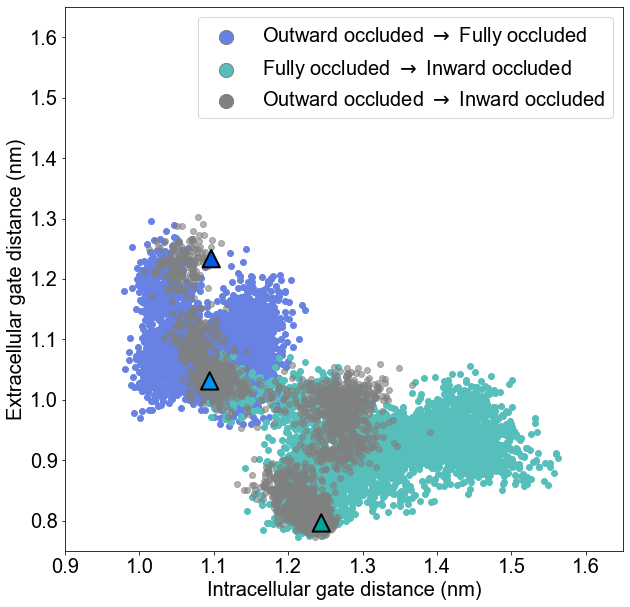

In [15]:
f, ax = plt.subplots(ncols = 1, figsize = (10,10))
color_l = ['#6782E2', '#57BFBB', 'grey']

if 'influx' in condition:
    label_l = [r'Outward occluded $\rightarrow$ Fully occluded', r'Fully occluded $\rightarrow$ Inward occluded',\
               r'Outward occluded $\rightarrow$ Inward occluded']
elif 'efflux' in condition:
    label_l = [r'Fully occluded $\rightarrow$ Outward occluded', r'Inward occluded $\rightarrow$ Fully occluded',\
               r'Inward occluded $\rightarrow$ Outward occluded']    
a = [1,1,0.6]


for n,u in enumerate(sim_l):
    gate_EC_dists, gate_IC_dists = make_gate_arr(u, gate_EC, gate_IC)
    ax.scatter(gate_IC_dists, gate_EC_dists, color = color_l[n], alpha = a[n])
    ## add a dummy out of the size for pretty labels
    ax.scatter(-1,-1, color=color_l[n], s=200, label = label_l[n], edgecolor = 'grey') 

ax.scatter(model_IC, model_EC, color = ['#0059E6', '#0096F5', '#00A396'], s = 300, marker = '^',\
           linewidth = 2, edgecolors='black')
 
    
#xlim = (0.7, 1.82)
#ylim = (0.6, 1.7)

## use same x and y lim as in GLUT5 atomistic plot
xlim = (0.9,1.65)
ylim = (0.75,1.65)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_xlabel('Intracellular gate distance (nm)')
ax.set_ylabel('Extracellular gate distance (nm)')


ax.legend()

plt.savefig(f'../images_figs/{condition}.TMD_skipping_occluded.svg', dpi = 1000)